In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Unique Players
column_names = ['pid', 'EventName', 'Time', 'Time_utc']
data = pd.read_csv('data/player_logged_in.csv', header=0, names=column_names)
# Get Unique Count of the first column in player logged in csv
uniquePlayersAmount = data['pid'].nunique()
print("Unique Player Amount = ", uniquePlayersAmount)


Unique Player Amount =  11080


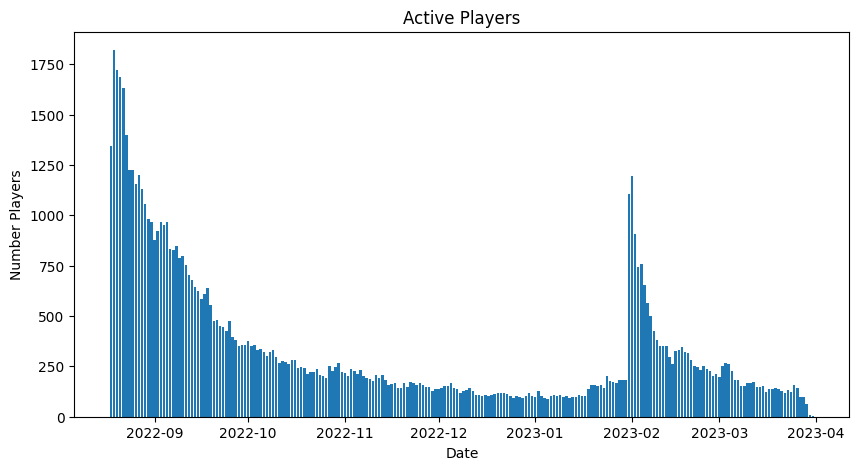

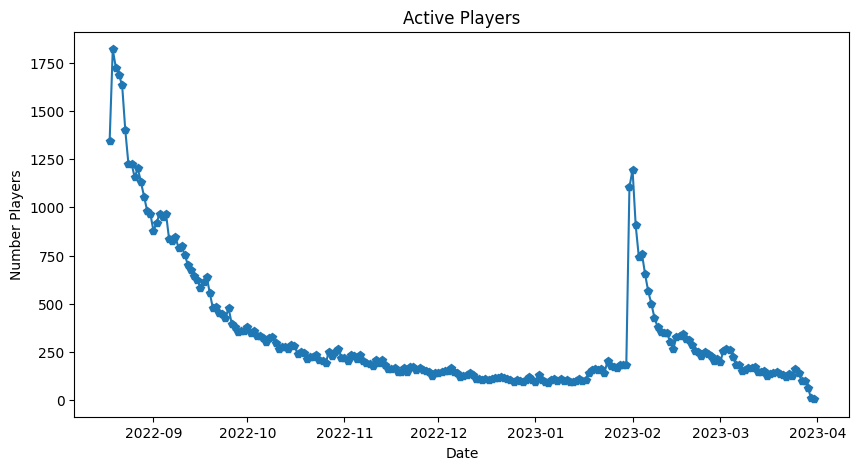

In [3]:
#Unique Players Per Day
#Get needed data
uniquePlayersData = data[['pid', 'Time']].copy()
uniquePlayersData['Date'] = pd.to_datetime(uniquePlayersData['Time']).dt.date
#group data by unique playerID and date
dailyPlayers = uniquePlayersData.groupby('Date')['pid'].nunique().reset_index()
dailyPlayers.columns = ['Date', 'ActivePlayers']

dailyPlayers.sort_values('Date')

#Bar
plt.figure(figsize=(10, 5))
plt.bar(dailyPlayers['Date'], dailyPlayers['ActivePlayers'])
plt.title('Active Players')
plt.xlabel('Date')
plt.ylabel('Number Players')
plt.show()

#Line
plt.figure(figsize=(10, 5))
plt.plot(dailyPlayers['Date'], dailyPlayers['ActivePlayers'], marker='p')
plt.title('Active Players')
plt.xlabel('Date')
plt.ylabel('Number Players')
plt.show()

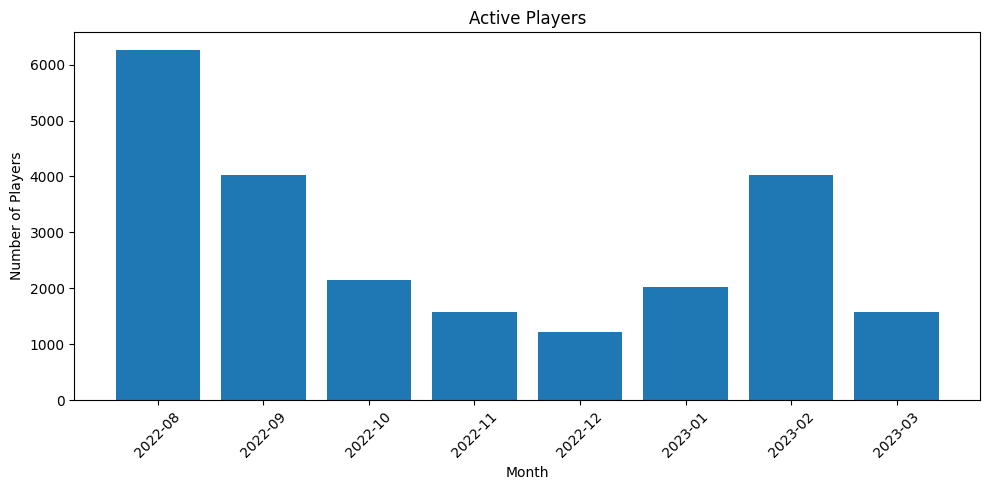

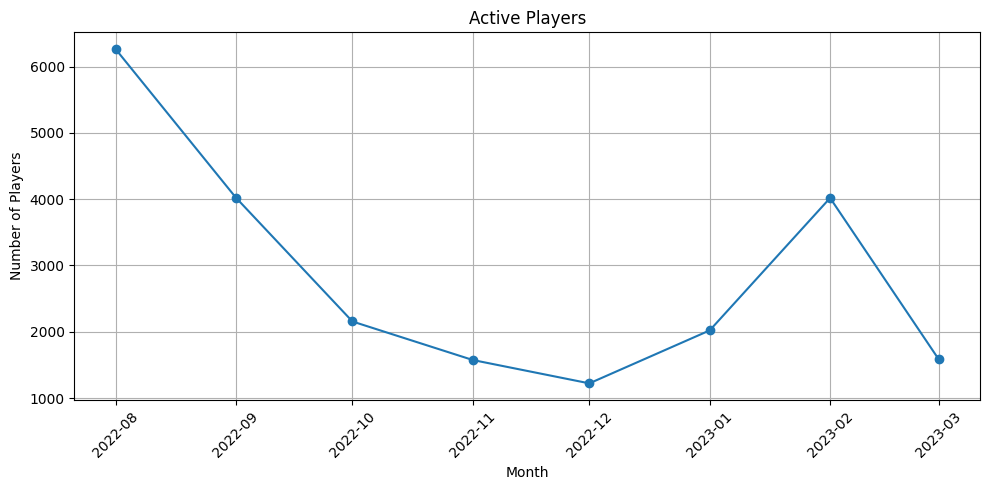

In [4]:
#Unique Players Per Month
uniquePlayersData['Month'] = pd.to_datetime(uniquePlayersData['Time']).dt.to_period('M').astype(str)
#group by unique id with month
monthlyPlayers = uniquePlayersData.groupby('Month')['pid'].nunique().reset_index()
monthlyPlayers['Month'] = pd.to_datetime(monthlyPlayers['Month'])

monthlyPlayers.columns = ['Month', 'ActivePlayers']

monthlyPlayers.sort_values('Month')

#Bar
plt.figure(figsize=(10, 5))
plt.bar(monthlyPlayers['Month'].dt.strftime('%Y-%m'), monthlyPlayers['ActivePlayers'])
plt.title('Active Players')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Line
plt.figure(figsize=(10, 5))
plt.plot(monthlyPlayers['Month'], monthlyPlayers['ActivePlayers'], marker='o')
plt.title('Active Players')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

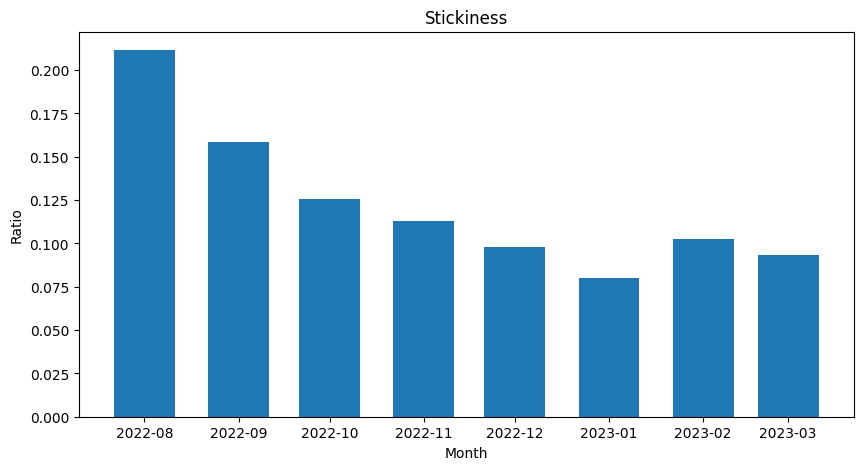

In [5]:
# Stickiness Calculation

# add month to daily players for calc
dailyPlayers['Month'] = pd.to_datetime(dailyPlayers['Date']).dt.to_period('M').dt.to_timestamp()
# get average dau every month
averageDAUPerMonth = dailyPlayers.groupby('Month')['ActivePlayers'].mean().reset_index()
averageDAUPerMonth.columns = ['Month', 'AverageDAU']

stickinessCalcData = pd.merge(averageDAUPerMonth, monthlyPlayers, on='Month')
stickinessCalcData['Stickiness'] = stickinessCalcData['AverageDAU'] / stickinessCalcData['ActivePlayers']

plt.figure(figsize=(10, 5))
plt.bar(stickinessCalcData['Month'], stickinessCalcData['Stickiness'], width=20)
plt.title('Stickiness')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.show()

# Stickiness tells us the average amount of players that keep coming back to the game over a certain period of time
# On the release of a game the games Stickiness tends to be the highest, which we can see here in the first month of the bar chart
# After the first month the game had a drop in game Stickiness each month.
# The Game stopped this trend in Febuary of 2023 for a single month. Maybe there was a large Update or DLC released ?

Sessions Amount =  105869
Median Session Time =  54.0


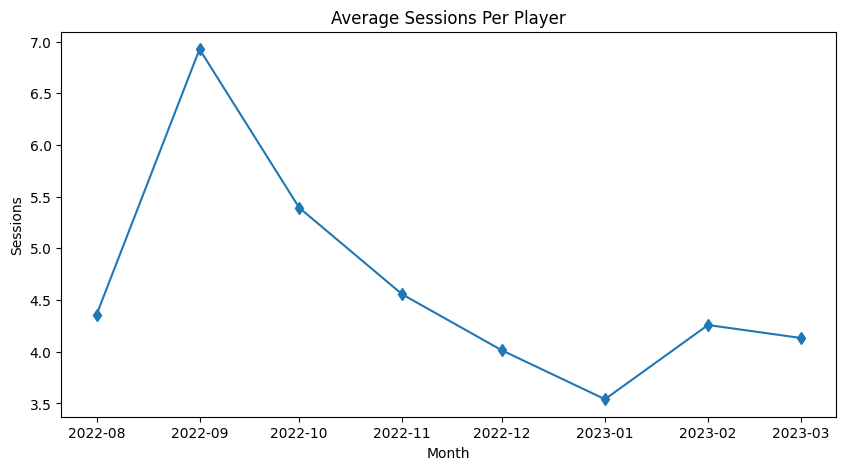

In [6]:
# Sessions
playerLoggedOffData = pd.read_csv('data/exited_game.csv')
playerLoggedOffData['Time'] = pd.to_datetime(playerLoggedOffData['Time'])

# session amount
allSessions = len(playerLoggedOffData)
print("Sessions Amount = ", allSessions)

medianSessionTime = playerLoggedOffData['CurrentSessionLength'].median()
print("Median Session Time = ", medianSessionTime)

# amount of sessions every month
playerLoggedOffData['Month'] = playerLoggedOffData['Time'].dt.to_period('M').dt.to_timestamp()
sessionsForEachPlayerMonthly = playerLoggedOffData.groupby(['Month', 'pid']).size().reset_index(name='SessionCount')
sessionsPerPlayer = sessionsForEachPlayerMonthly.groupby('Month')['SessionCount'].mean().reset_index()
sessionsPerPlayer.columns = ['Month', 'SessionsPerPlayer']

plt.figure(figsize=(10, 5))
plt.plot(sessionsPerPlayer['Month'], sessionsPerPlayer['SessionsPerPlayer'], marker='d')
plt.title('Average Sessions Per Player')
plt.xlabel('Month')
plt.ylabel('Sessions')
plt.show()


C:\Users\adria\AppData\Local\Temp\ipykernel_24212\734964732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredData['SessionLengths'] = pd.cut(filteredData['CurrentSessionLength'], bins=sessionLengths, labels=lengthLabels)
C:\Users\adria\AppData\Local\Temp\ipykernel_24212\734964732.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meanLevelProg = filteredData.groupby('SessionLengths')['LevelProgressionAmount'].mean().reset_index()


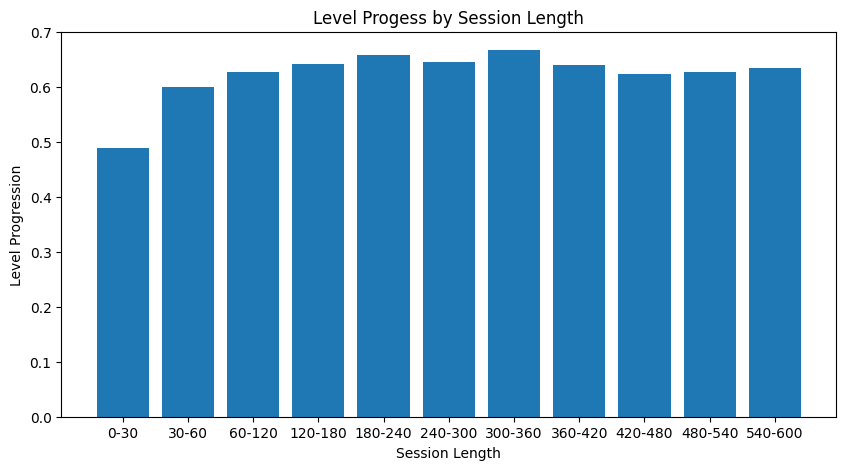

In [7]:
# Level Progression
data = pd.read_csv('data/exited_game.csv')

# get rid of unrealistic outliers which skew the data
filteredData = data[data['CurrentSessionLength'] <= 600]

sessionLengths = [0, 30, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600]
lengthLabels = [f'{sessionLengths[i]}-{sessionLengths[i+1]}' for i in range(len(sessionLengths)-1)]
# get data filtered between session lengths
filteredData['SessionLengths'] = pd.cut(filteredData['CurrentSessionLength'], bins=sessionLengths, labels=lengthLabels)

meanLevelProg = filteredData.groupby('SessionLengths')['LevelProgressionAmount'].mean().reset_index()

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(meanLevelProg['SessionLengths'], meanLevelProg['LevelProgressionAmount'])
plt.title('Level Progess by Session Length')
plt.xlabel('Session Length')
plt.ylabel('Level Progression')
plt.show()

# Progession Generally increass up to 240 minutes, it then starts to average itself out. 
# This is likely a cause of the player being either stuck on something or leaving the game open in the background
#

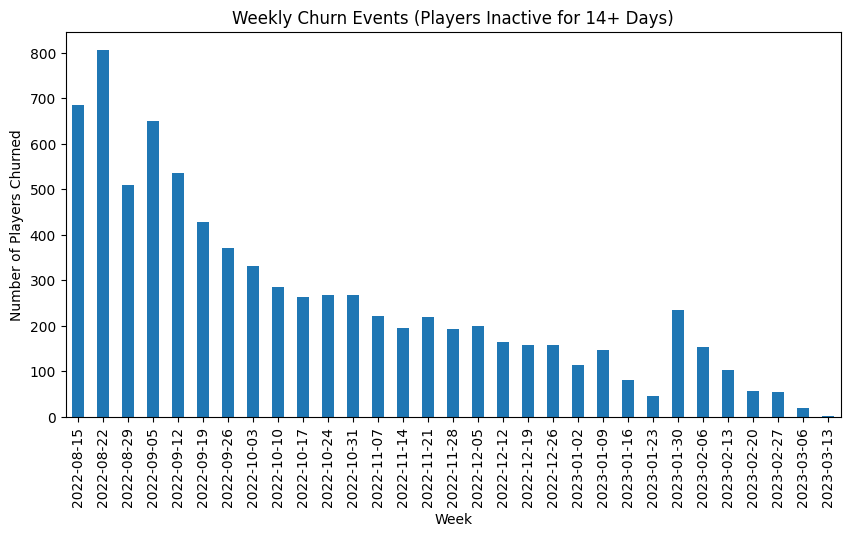

In [ ]:
data = pd.read_csv('data/player_logged_in.csv')
data['Time'] = pd.to_datetime(data['Time'])

# gap between logins
data['NextLoginGap'] = data.groupby('pid')['Time'].diff().shift(-1)

# churn threshold
churnTime = pd.Timedelta(days=14)

# if time to next login in larger then 14 days add it to new column
data['Churned'] = data['NextLoginGap'] > churnTime
churnPlayer = data[data['Churned']].copy()

# organize churn data into weekly periods of churn
churnPlayer['ChurnWeek'] = churnPlayer['Time'].dt.to_period('W').dt.to_timestamp()

churnPlayerCount = churnPlayer.groupby('ChurnWeek').size()

# remove hours,minutes,seconds from graph info
churnPlayerCount.index = churnPlayerCount.index.strftime('%Y-%m-%d')

# Plot the results
plt.figure(figsize=(10, 5))
churnPlayerCount.plot(kind='bar')
plt.title('Weekly Churn Events (Players Inactive for 14+ Days)')
plt.xlabel('Week')
plt.ylabel('Number of Players Churned')
plt.show()

# Early spike in churn usually collarates with a games release, people play the game for a couple of days and leave it after completing it or they found out its not their type of game.
# As Time goes on usually more casual player tend to start leaving, leaving the game with just their core audiance.
# the sharp decrease in churn could mean that a core audiance is only left. Or the game died and has no more players picking up the game.
# on week 2023-02-06 there was a significant spike in churn, which could mean that there was a new update released or a successful media campiagn.